In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from flask import Flask

%matplotlib inline

In [2]:
#Loading csv file using pandas
df = pd.read_csv('insurance.csv')

In [3]:
#Display the first five columns of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,central,16884.92400
1,18,male,33.770,1,no,central,1725.55230
2,28,male,33.000,3,no,central,4449.46200
3,33,male,22.705,0,no,riftvalley,21984.47061
4,32,male,28.880,0,no,riftvalley,3866.85520


In [4]:
#Display the last five columns of the dataset
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,riftvalley,10600.5483
1334,18,female,31.92,0,no,coast,2205.9808
1335,18,female,36.85,0,no,central,1629.8335
1336,21,female,25.80,0,no,nyanza,2007.9450
1337,61,female,29.07,0,yes,riftvalley,29141.3603


In [5]:
#Randomly display any number of records of data
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
1283,18,male,30.030,1,no,central,1720.35370
1059,32,male,33.820,1,no,riftvalley,4462.72180
183,44,female,26.410,0,no,riftvalley,7419.47790
954,34,male,27.835,1,yes,riftvalley,20009.63365
543,54,female,47.410,0,yes,central,63770.42801


In [6]:
#Number of rows and columns

df.shape

(1338, 7)

In [7]:
#List the types of all columns 
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df['region'].value_counts().sort_values()

coast         321
riftvalley    325
nyanza        328
central       364
Name: region, dtype: int64

In [9]:
#Finding out if the dataset contains null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
#Checking for missing values

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
#DATA ANALYSIS

#Statistical measures of the dataset

df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
#Distribution of numerical features

[features for features in df.dtypes[df.dtypes != 'object'].index]

['age', 'bmi', 'children', 'charges']

In [13]:
num_features = df.dtypes[df.dtypes != 'object'].index

In [14]:
num_features

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [15]:
len(num_features)

4

In [16]:
#Summarize numerical features

df[num_features].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [17]:
#Distribution of categorical features
cat_features = df.dtypes[df.dtypes == 'object'].index

In [18]:
cat_features

Index(['sex', 'smoker', 'region'], dtype='object')

In [19]:
len(cat_features)

3

In [20]:
df[cat_features].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,central
freq,676,1064,364


In [21]:
#Check the unique labels of the 'sex' variable
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [22]:
#print the number of labels of 'sex' variable
print(df.sex.value_counts())

male      676
female    662
Name: sex, dtype: int64


In [23]:
#check the unique labels of 'smoker' variable
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [24]:
#print the number of labels of 'smoker' variable
print(df.smoker.value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


In [25]:
#check the unique labels of 'region' variable
df['region'].unique()

array(['central', 'riftvalley', 'coast', 'nyanza'], dtype=object)

In [26]:
#print the number of labels of 'region' variable
print(df.region.value_counts())

central       364
nyanza        328
riftvalley    325
coast         321
Name: region, dtype: int64


In [27]:
#DATA CLEANING

#checking the shape before dropping duplicates
df.shape

(1338, 7)

In [28]:
df = df.drop_duplicates()

In [29]:
#checking the shape after dropping duplicates
df.shape

(1337, 7)

In [30]:
#check the missing values in any column
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

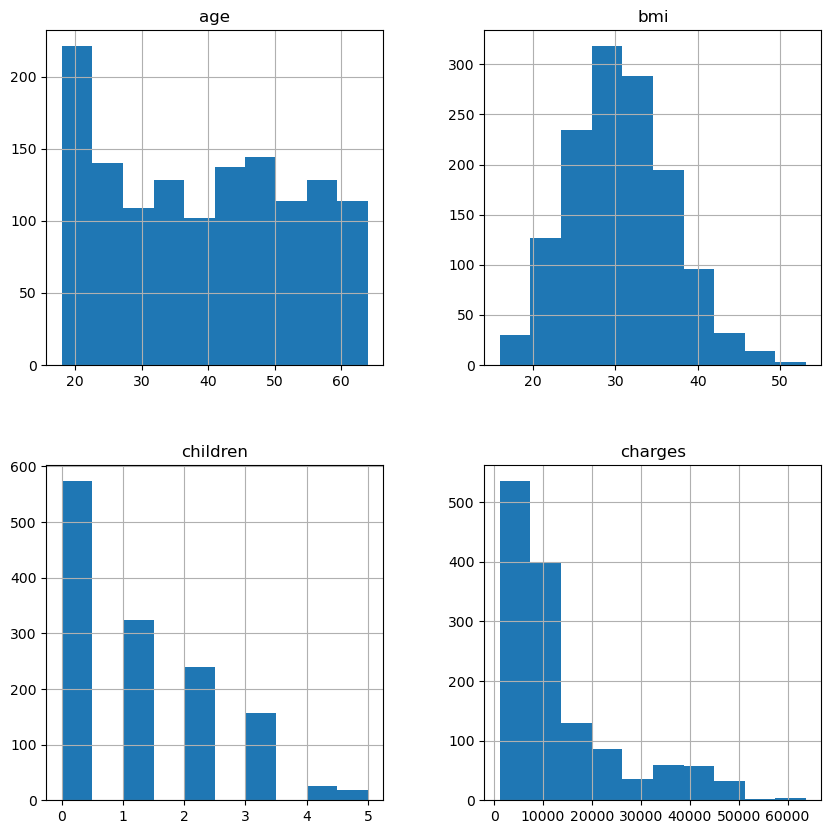

In [31]:
#Plotting histograms for the numerical features
df.hist(bins=10,figsize=(10,10))
plt.show()



array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='children', ylabel='age'>,
        <AxesSubplot:xlabel='charges', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot:xlabel='children', ylabel='bmi'>,
        <AxesSubplot:xlabel='charges', ylabel='bmi'>],
       [<AxesSubplot:xlabel='age', ylabel='children'>,
        <AxesSubplot:xlabel='bmi', ylabel='children'>,
        <AxesSubplot:xlabel='children', ylabel='children'>,
        <AxesSubplot:xlabel='charges', ylabel='children'>],
       [<AxesSubplot:xlabel='age', ylabel='charges'>,
        <AxesSubplot:xlabel='bmi', ylabel='charges'>,
        <AxesSubplot:xlabel='children', ylabel='charges'>,
        <AxesSubplot:xlabel='charges', ylabel='charges'>]], dtype=object)

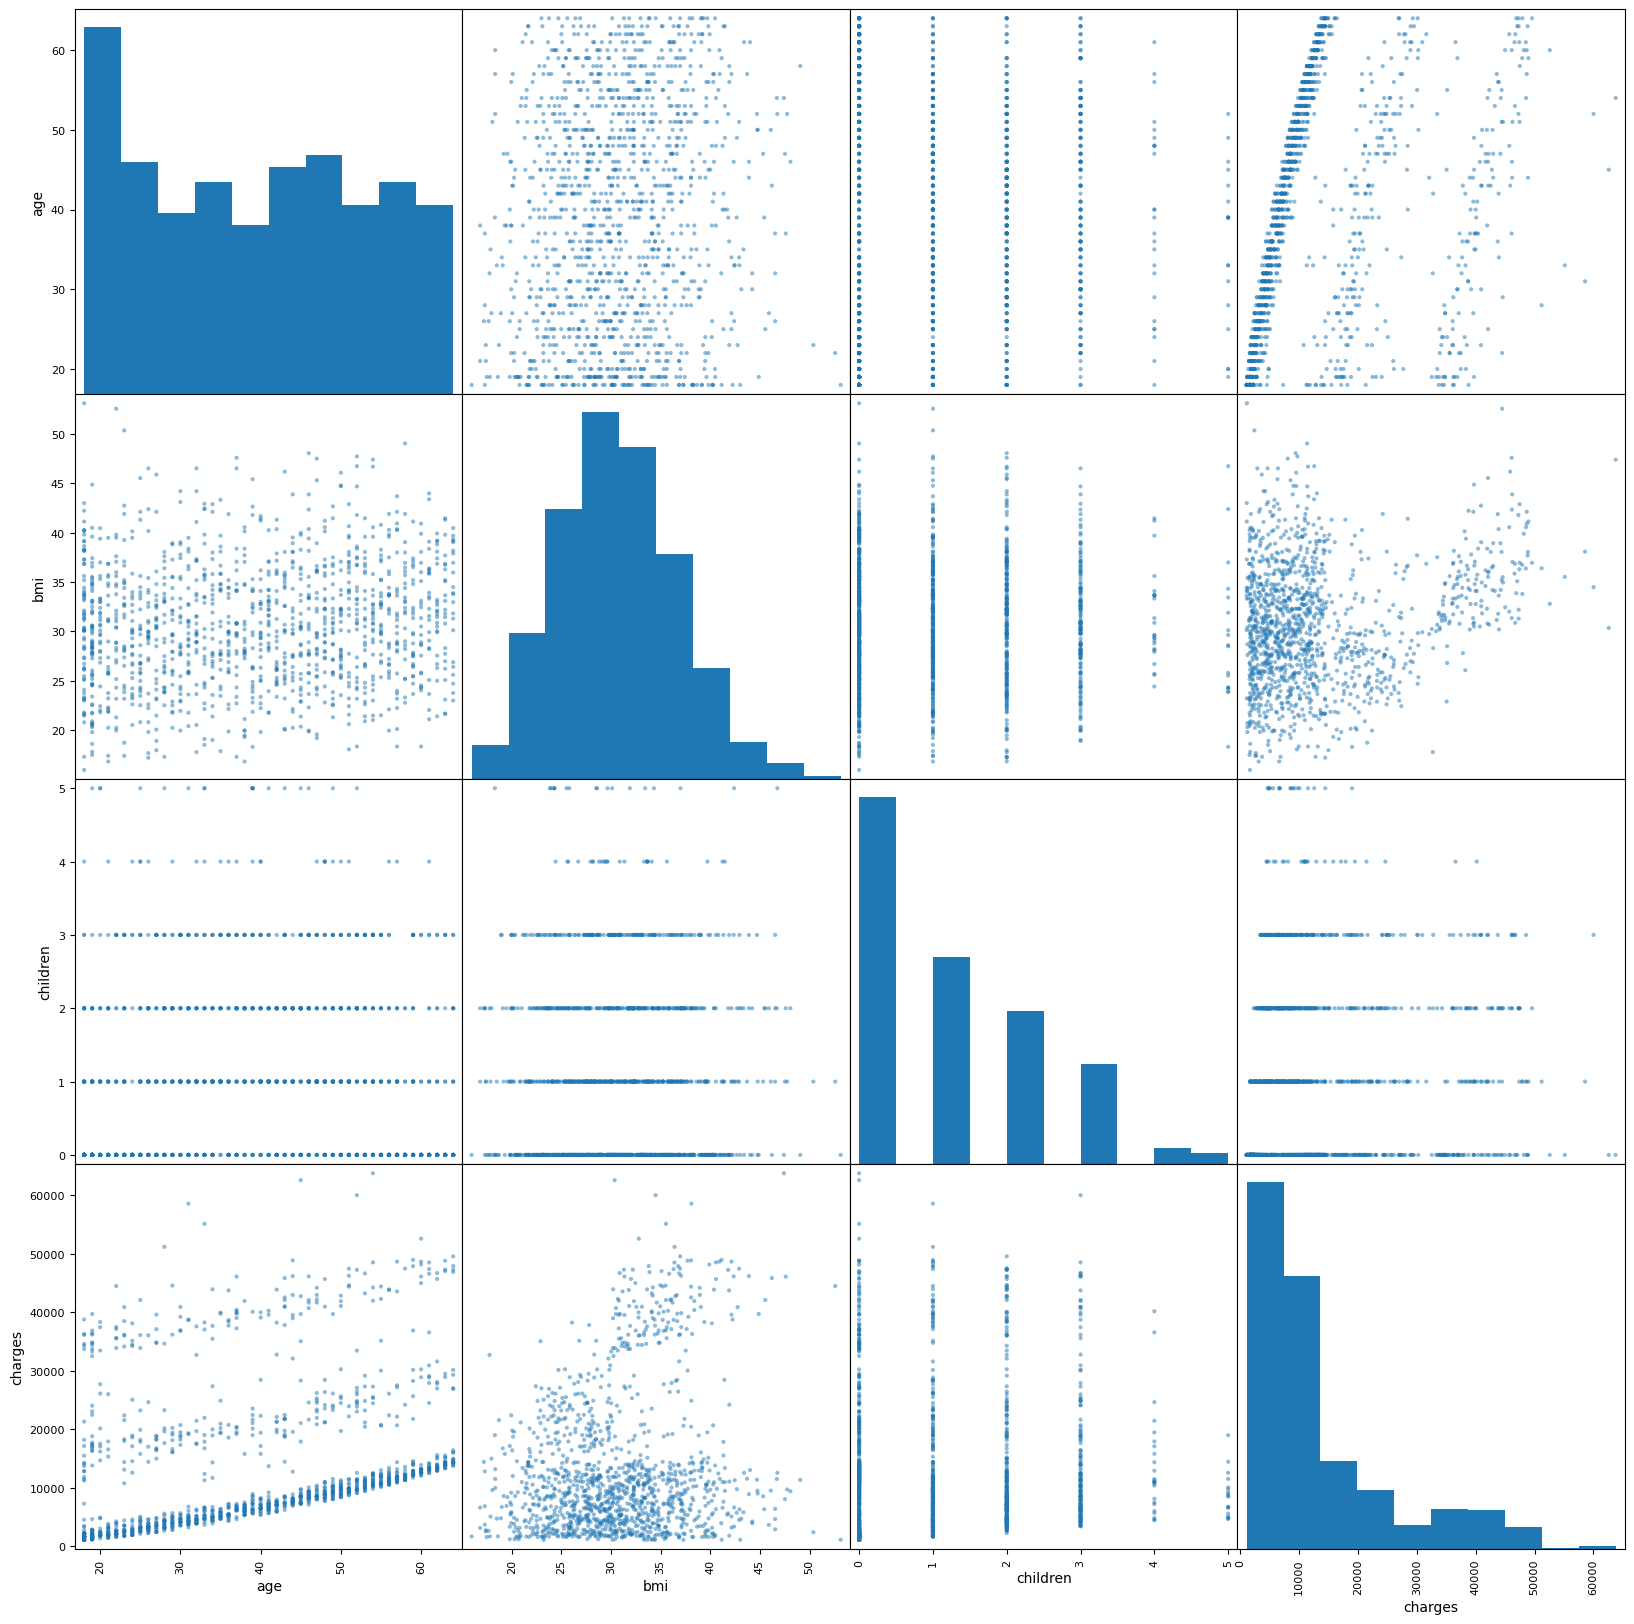

In [32]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (20,20))

In [33]:
#Encoding the categorical features

dummies=pd.get_dummies(df.sex)

In [34]:
dummies.head()

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [35]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,central,16884.92400
1,18,male,33.770,1,no,central,1725.55230
2,28,male,33.000,3,no,central,4449.46200
3,33,male,22.705,0,no,riftvalley,21984.47061
4,32,male,28.880,0,no,riftvalley,3866.85520


In [36]:
#Concatinating the original dataset and the dummies
merge=pd.concat([df, dummies],axis=1)
merge.head()

,age,sex,bmi,children,smoker,region,charges,female,male
0,19,female,27.900,0,yes,central,16884.92400,1,0
1,18,male,33.770,1,no,central,1725.55230,0,1
2,28,male,33.000,3,no,central,4449.46200,0,1
3,33,male,22.705,0,no,riftvalley,21984.47061,0,1
4,32,male,28.880,0,no,riftvalley,3866.85520,0,1


In [37]:
df1=merge.drop(['sex','female'],axis=1)
df1.head()

,age,bmi,children,smoker,region,charges,male
0,19,27.900,0,yes,central,16884.92400,0
1,18,33.770,1,no,central,1725.55230,1
2,28,33.000,3,no,central,4449.46200,1
3,33,22.705,0,no,riftvalley,21984.47061,1
4,32,28.880,0,no,riftvalley,3866.85520,1


In [38]:
dummi1=pd.get_dummies(df1.smoker)
dummi1.head()

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [39]:
merge1=pd.concat([df1,dummi1],axis=1)
df2=merge1.drop(['smoker','no'],axis=1)
df2.head()

,age,bmi,children,region,charges,male,yes
0,19,27.900,0,central,16884.92400,0,1
1,18,33.770,1,central,1725.55230,1,0
2,28,33.000,3,central,4449.46200,1,0
3,33,22.705,0,riftvalley,21984.47061,1,0
4,32,28.880,0,riftvalley,3866.85520,1,0


In [40]:
dummi2=pd.get_dummies(df2.region)
dummi2.head()

,central,coast,nyanza,riftvalley
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [41]:
merge2=pd.concat([df2,dummi2],axis=1)
merge2.head()

,age,bmi,children,region,charges,male,yes,central,coast,nyanza,riftvalley
0,19,27.900,0,central,16884.92400,0,1,1,0,0,0
1,18,33.770,1,central,1725.55230,1,0,1,0,0,0
2,28,33.000,3,central,4449.46200,1,0,1,0,0,0
3,33,22.705,0,riftvalley,21984.47061,1,0,0,0,0,1
4,32,28.880,0,riftvalley,3866.85520,1,0,0,0,0,1


In [42]:
df3=merge2.drop(['region','coast'],axis=1)
df3.head()

,age,bmi,children,charges,male,yes,central,nyanza,riftvalley
0,19,27.900,0,16884.92400,0,1,1,0,0
1,18,33.770,1,1725.55230,1,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0
3,33,22.705,0,21984.47061,1,0,0,0,1
4,32,28.880,0,3866.85520,1,0,0,0,1


In [43]:
df3.shape

(1337, 9)

In [44]:
#DATA FRAME SPLIT into X and y

target_name = 'charges'
#separate object for target feature
y = df3[target_name]
#separate object for input features
X = df3.drop(target_name,axis=1)

In [45]:
X.head()

,age,bmi,children,male,yes,central,nyanza,riftvalley
0,19,27.900,0,0,1,1,0,0
1,18,33.770,1,1,0,1,0,0
2,28,33.000,3,1,0,1,0,0
3,33,22.705,0,1,0,0,0,1
4,32,28.880,0,1,0,0,0,1


In [46]:
X.shape

(1337, 8)

In [47]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [48]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [49]:
X_train.shape,y_train.shape

((1069, 8), (1069,))

In [50]:
X_test.shape,y_test.shape

((268, 8), (268,))

In [51]:
#Building the regression model

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [52]:
#Evaluation Metrics
#train score
train_score=lr.score(X_train,y_train)
print('Train score:',train_score)

Train score: 0.7531697596425511


In [53]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("r_2 score",score)

r_2 score 0.7404024148323913


In [54]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error: 4397.177213557674
Mean Squared Error: 41934617.73994633
Root Mean Squared Error: 66.31121484000782


In [55]:
df4=pd.DataFrame({'Actual' :y_test, 'predicted' :y_pred, 'variance':y_test-y_pred})
df4.head()

,Actual,predicted,variance
13,11090.71780,14403.452264,-3312.734464
1052,9288.02670,11337.996532,-2049.969832
172,1694.79640,-1751.462680,3446.259080
395,7526.70645,5777.474160,1749.232290
934,4673.39220,8419.008454,-3745.616254


In [56]:
df3.head(14)

,age,bmi,children,charges,male,yes,central,nyanza,riftvalley
0,19,27.900,0,16884.92400,0,1,1,0,0
1,18,33.770,1,1725.55230,1,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0
3,33,22.705,0,21984.47061,1,0,0,0,1
4,32,28.880,0,3866.85520,1,0,0,0,1
5,31,25.740,0,3756.62160,0,0,1,0,0
6,46,33.440,1,8240.58960,0,0,1,0,0
7,37,27.740,3,7281.50560,0,0,0,0,1
8,37,29.830,2,6406.41070,1,0,0,0,1
9,60,25.840,0,28923.13692,0,0,0,0,1


In [57]:
lr.predict([[56,39.820,0,0,0,1,0,0]])

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14403.45226445])

In [58]:
print("intercept",lr.intercept_)

intercept -11678.451584985849


In [59]:
print("coefficients",lr.coef_)

coefficients [  253.76746086   338.76856305   523.94795655   -47.57165683
 23735.51063476 -1618.83813905 -1167.01223306  -896.05561712]


In [60]:
#Linear equation "y=mx+c
253.76746086*56+338.76856305*39.820+523.94795655*0-47.57165683*0 +23735.51063476*0-1618.83813905*1-1167.01223306*0-896.05561712*0-11678.451584985849


14403.452264775153

In [61]:
#FEATURE SELECTION

import statsmodels.api as sm

In [62]:
X.head()

,age,bmi,children,male,yes,central,nyanza,riftvalley
0,19,27.900,0,0,1,1,0,0
1,18,33.770,1,1,0,1,0,0
2,28,33.000,3,1,0,1,0,0
3,33,22.705,0,1,0,0,0,1
4,32,28.880,0,1,0,0,0,1


In [63]:
X.shape

(1337, 8)

In [64]:
X1=np.append(arr=np.ones((1337,1)).astype(int),values=X,axis=1)

In [65]:
X1.shape

(1337, 9)

In [66]:
X.head()

,age,bmi,children,male,yes,central,nyanza,riftvalley
0,19,27.900,0,0,1,1,0,0
1,18,33.770,1,1,0,1,0,0
2,28,33.000,3,1,0,1,0,0
3,33,22.705,0,1,0,0,0,1
4,32,28.880,0,1,0,0,0,1


In [67]:
X1

array([[ 1.  , 19.  , 27.9 , ...,  1.  ,  0.  ,  0.  ],
       [ 1.  , 18.  , 33.77, ...,  1.  ,  0.  ,  0.  ],
       [ 1.  , 28.  , 33.  , ...,  1.  ,  0.  ,  0.  ],
       ...,
       [ 1.  , 18.  , 36.85, ...,  1.  ,  0.  ,  0.  ],
       [ 1.  , 21.  , 25.8 , ...,  0.  ,  1.  ,  0.  ],
       [ 1.  , 61.  , 29.07, ...,  0.  ,  0.  ,  1.  ]])

In [68]:
#Choose a significance level usually 0.05, if p>0.05
#For the highest values parameter, remove that value

X_opt=X1[:,[0,1,2,3,4,5,6,7,8]]
X_opt.shape

(1337, 9)

In [69]:
X.head()

,age,bmi,children,male,yes,central,nyanza,riftvalley
0,19,27.900,0,0,1,1,0,0
1,18,33.770,1,1,0,1,0,0
2,28,33.000,3,1,0,1,0,0
3,33,22.705,0,1,0,0,0,1
4,32,28.880,0,1,0,0,0,1


In [70]:
X_opt

array([[ 1.  , 19.  , 27.9 , ...,  1.  ,  0.  ,  0.  ],
       [ 1.  , 18.  , 33.77, ...,  1.  ,  0.  ,  0.  ],
       [ 1.  , 28.  , 33.  , ...,  1.  ,  0.  ,  0.  ],
       ...,
       [ 1.  , 18.  , 36.85, ...,  1.  ,  0.  ,  0.  ],
       [ 1.  , 21.  , 25.8 , ...,  0.  ,  1.  ,  0.  ],
       [ 1.  , 61.  , 29.07, ...,  0.  ,  0.  ,  1.  ]])

In [71]:
#'constant' 0th column
X_opt[:,0]

array([1., 1., 1., ..., 1., 1., 1.])

In [72]:
#'age' 1st column
X_opt[:,1]

array([19., 18., 28., ..., 18., 21., 61.])

In [73]:
#'bmi' 2nd column
X_opt[:,2]

array([27.9 , 33.77, 33.  , ..., 36.85, 25.8 , 29.07])

In [74]:
#'children' 3rd column
X_opt[:,3]

array([0., 1., 3., ..., 0., 0., 0.])

In [75]:
#'male'4th column
X_opt[:,4]

array([0., 1., 1., ..., 0., 0., 0.])

In [76]:
#'yes' 5th column
X_opt[:,5]

array([1., 0., 0., ..., 0., 0., 1.])

In [77]:
#'central' 6th column
X_opt[:,6]

array([1., 1., 1., ..., 1., 0., 0.])

In [78]:
#'nyanza' 7th column
X_opt[:,7]

array([0., 0., 0., ..., 0., 1., 0.])

In [79]:
#'riftvalley' 8th column
X_opt[:,8]

array([0., 0., 0., ..., 0., 0., 1.])

In [80]:
#A summary of 'Ordinary Least Square'
ols=sm.OLS(endog=y,exog=X_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.4
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:03:34   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1328   BIC:                         2.714e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.193e+04    987.962    -12.071      0.000   -1.39e+04   -9987.453
x1           256.6974     11.909     21.555      0.000     233.335     280.060
x2           340.3875     28.560     11.918      0.000     284.361     396.414
x3           473.9827    137.892      3.437      0.001     203.473     744.492
x4          -134.4666    333.099     -0.404      0.687    -787.924     518.990
x5          2.385e+04    413.194     57.728      0.000     2.3e+04    2.47e+04
x6         -1116.2710    479.311     -2.329      0.020   -2056.560    -175.982
x7         -1008.2574    478.027     -2.109      0.035   -1946.027     -70.487
x8          -369.3758    477.755     -0.773      0.440   -1306.613     567.861
==============================================================================
Omnibus:                      300.411   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.636
Skew:                           1.212   Prob(JB):                    8.92e-157
Kurtosis:                       5.649   Cond. No.                         312.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
#Removing 4th column(X4=male) from X1 as its highest p-value is 0.687
#build the OLS with remaining features and check the most significance value 
X_opt1=X1[:,[0,1,2,3,5,6,7,8]]
X_opt1.shape


(1337, 8)

In [82]:
ols=sm.OLS(endog=y,exog=X_opt1).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.3
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:03:34   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1329   BIC:                         2.713e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.198e+04    978.861    -12.237      0.000   -1.39e+04   -1.01e+04
x1           256.8130     11.902     21.578      0.000     233.465     280.161
x2           339.8363     28.518     11.917      0.000     283.891     395.782
x3           472.9861    137.826      3.432      0.001     202.605     743.367
x4          2.384e+04    411.883     57.881      0.000     2.3e+04    2.46e+04
x5         -1114.5856    479.142     -2.326      0.020   -2054.543    -174.629
x6         -1006.6643    477.860     -2.107      0.035   -1944.106     -69.222
x7          -367.7172    477.587     -0.770      0.441   -1304.624     569.189
==============================================================================
Omnibus:                      300.779   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.265
Skew:                           1.213   Prob(JB):                    3.95e-157
Kurtosis:                       5.653   Cond. No.                         309.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
#Removing 7th column(riftvalley) from X1 as its highest p-value is 0.441
#build the OLS with remaining features and check the most significance value 
reg_opt2=X1[:,[0,1,2,3,5,6,8]]
reg_opt2.shape

(1337, 7)

In [84]:
ols=sm.OLS(endog=y,exog=reg_opt2).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     665.2
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:03:34   Log-Likelihood:                -13540.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1330   BIC:                         2.713e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.234e+04    965.291    -12.780      0.000   -1.42e+04   -1.04e+04
x1           256.9576     11.917     21.562      0.000     233.579     280.336
x2           334.7888     28.454     11.766      0.000     278.969     390.608
x3           464.2622    137.942      3.366      0.001     193.655     734.870
x4          2.386e+04    412.320     57.865      0.000    2.31e+04    2.47e+04
x5          -590.3750    409.986     -1.440      0.150   -1394.665     213.915
x6           138.0918    413.375      0.334      0.738    -672.847     949.030
==============================================================================
Omnibus:                      302.309   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              723.824
Skew:                           1.220   Prob(JB):                    6.66e-158
Kurtosis:                       5.654   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
X_opt3=X1[:,[0,1,2,3,5,7]]
X_opt3.shape

(1337, 6)

In [86]:
ols=sm.OLS(endog=y,exog=X_opt3).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     797.9
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:03:34   Log-Likelihood:                -13541.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1331   BIC:                         2.712e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.198e+04    946.905    -12.654      0.000   -1.38e+04   -1.01e+04
x1           257.9485     11.908     21.662      0.000     234.588     281.309
x2           321.6934     27.382     11.748      0.000     267.977     375.410
x3           478.1443    137.907      3.467      0.001     207.605     748.684
x4          2.379e+04    411.577     57.807      0.000     2.3e+04    2.46e+04
x5          -489.9497    386.165     -1.269      0.205   -1247.508     267.609
==============================================================================
Omnibus:                      298.905   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              712.302
Skew:                           1.208   Prob(JB):                    2.12e-155
Kurtosis:                       5.636   Cond. No.                         293.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
X_opt4=X1[:,[0,1,2,3,5]]
X_opt4.shape

(1337, 5)

In [88]:
ols=sm.OLS(endog=y,exog=X_opt4).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     996.5
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:03:34   Log-Likelihood:                -13541.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1332   BIC:                         2.712e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.21e+04    942.630    -12.835      0.000   -1.39e+04   -1.02e+04
x1           257.7728     11.910     21.644      0.000     234.409     281.137
x2           321.8708     27.388     11.752      0.000     268.143     375.599
x3           472.9751    137.879      3.430      0.001     202.492     743.458
x4          2.381e+04    411.414     57.875      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      300.944   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              719.880
Skew:                           1.215   Prob(JB):                    4.79e-157
Kurtosis:                       5.650   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
#we take the 4 features from the backward selection method.(x1-age,x2-bmi,x3-children,x4-yes)

X_opt4

array([[ 1.  , 19.  , 27.9 ,  0.  ,  1.  ],
       [ 1.  , 18.  , 33.77,  1.  ,  0.  ],
       [ 1.  , 28.  , 33.  ,  3.  ,  0.  ],
       ...,
       [ 1.  , 18.  , 36.85,  0.  ,  0.  ],
       [ 1.  , 21.  , 25.8 ,  0.  ,  0.  ],
       [ 1.  , 61.  , 29.07,  0.  ,  1.  ]])

In [90]:
X_train,X_test,y_train,y_test=train_test_split(X_opt4,y,test_size=0.2,random_state=0)
new_model=LinearRegression()
new_model.fit(X_train,y_train)

LinearRegression()

In [91]:
new_pred=new_model.predict(X_test)

In [92]:
#train score after applying Backward Elimination method
train1_score=new_model.score(X_train,y_train)
print('Train score:',train1_score)

Train score: 0.7474999066916996


In [93]:
score=r2_score(y_test,new_pred)
print("r_2 score",score)

r_2 score 0.7525301553132631


In [94]:
print("Mean Absolute Error",metrics.mean_absolute_error(y_test,new_pred))
print("Mean Squared Error",metrics.mean_squared_error(y_test,new_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_absolute_error(y_test,new_pred)))


Mean Absolute Error 4391.030199416325
Mean Squared Error 41631744.81004626
Root Mean Squared Error: 66.26484889755899


In [95]:
new_df=pd.DataFrame({'Actual':y_test,'predicted':new_pred,'variance':y_test-new_pred})
new_df.head()

,Actual,predicted,variance
1248,1633.9618,5222.417439,-3588.455639
610,8547.6913,9714.166714,-1166.475414
393,9290.1395,10792.764683,-1502.625183
503,32548.3405,26394.295564,6154.044936
198,9644.2525,6845.668116,2798.584384


In [96]:
X_opt[198,:]

array([ 1.  , 51.  , 18.05,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ])

In [97]:
new_model.predict([[1.,51.,18.05,0.,0.]])

array([6845.66811561])

In [98]:
print("intercept",new_model.intercept_)

intercept -11020.958919546363


In [99]:
print("coefficients",new_model.coef_)

coefficients [    0.           245.17922603   297.09066525   486.14917145
 23769.85656523]


In [100]:
0*1.+245.17922603*51.+297.09066525*18.05+486.14917145*0+23769.85656523*0-11020.958919546363

6845.668115746135